In [12]:
#complite_accidents = pd.read_csv("C:/Users/bonis/Downloads/US_Accidents_March23.csv")

In [13]:
#complite_accidents.columns

In [14]:
#la_accidents = complite_accidents[complite_accidents['City'] == 'Los Angeles']

In [15]:
# Save the la_accidents to a CSV file
#la_accidents.to_csv("../data/processed/LA_Accidents.csv", index=False)

In [16]:
#la_accidents.describe()

In [17]:

import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
la_accidents = pd.read_csv("../data/processed/LA_Accidents.csv")

In [18]:
#la_accidents = complite_accidents[complite_accidents['City'] == 'Los Angeles']

columns_to_keep = [
    'Start_Time', 'Temperature(F)', 
    'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
    'Wind_Speed(mph)', 'Weather_Condition',
    'Sunrise_Sunset'
]

# Create a copy of the DataFrame
filtered_la_accidents = la_accidents[columns_to_keep].copy()

filtered_la_accidents['Date'] = pd.to_datetime(filtered_la_accidents['Start_Time'], format="mixed")


In [19]:
print(filtered_la_accidents)
missing_values_count = filtered_la_accidents.isnull().sum()
missing_values_count[0:]

                 Start_Time  Temperature(F)  Humidity(%)  Pressure(in)  \
0       2016-06-21 10:46:30            82.9         47.0         29.95   
1       2016-06-21 10:49:21            82.9         47.0         29.95   
2       2016-06-21 10:51:45            82.9         47.0         29.95   
3       2016-06-21 10:56:24            82.9         47.0         29.95   
4       2016-06-21 11:30:46            80.1         52.0         29.96   
...                     ...             ...          ...           ...   
156486  2019-08-22 17:07:14            72.0         76.0         29.57   
156487  2019-08-23 04:04:48            67.0         79.0         29.62   
156488  2019-08-23 12:52:31            81.0         49.0         29.66   
156489  2019-08-23 13:42:50            82.0         47.0         29.65   
156490  2019-08-23 15:45:43            74.0         66.0         29.64   

        Visibility(mi) Wind_Direction  Wind_Speed(mph) Weather_Condition  \
0                 10.0       Variab

Start_Time               0
Temperature(F)        1105
Humidity(%)           1180
Pressure(in)           965
Visibility(mi)         684
Wind_Direction        2431
Wind_Speed(mph)      23989
Weather_Condition      650
Sunrise_Sunset           0
Date                     0
dtype: int64

In [20]:
from sklearn.impute import KNNImputer
import pandas as pd

# List of numerical columns with missing values
numerical_cols = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

# Extract the relevant columns for imputation
data_for_imputation = filtered_la_accidents[numerical_cols]

# Print the count of missing values before imputation
print("Missing values before imputation:")
print(data_for_imputation.isnull().sum())

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=3)  

# Perform imputation
imputed_data = imputer.fit_transform(data_for_imputation)

# Create a DataFrame with imputed data
imputed_df = pd.DataFrame(imputed_data, columns=numerical_cols, index=filtered_la_accidents.index)

# Replace the original numerical columns with the imputed data
filtered_la_accidents[numerical_cols] = imputed_df

# Print the count of missing values after imputation
print("\nMissing values after imputation:")
print(filtered_la_accidents[numerical_cols].isnull().sum())



Missing values before imputation:
Temperature(F)      1105
Humidity(%)         1180
Pressure(in)         965
Visibility(mi)       684
Wind_Speed(mph)    23989
dtype: int64

Missing values after imputation:
Temperature(F)     0
Humidity(%)        0
Pressure(in)       0
Visibility(mi)     0
Wind_Speed(mph)    0
dtype: int64


In [21]:
print(filtered_la_accidents.isnull().sum())

Start_Time              0
Temperature(F)          0
Humidity(%)             0
Pressure(in)            0
Visibility(mi)          0
Wind_Direction       2431
Wind_Speed(mph)         0
Weather_Condition     650
Sunrise_Sunset          0
Date                    0
dtype: int64


In [22]:
from sklearn.impute import KNNImputer
import pandas as pd

# Define columns
categorical_cols = ['Wind_Direction', 'Weather_Condition']

# Convert categorical columns to numeric using encoding
for col in categorical_cols:
    filtered_la_accidents[col] = filtered_la_accidents[col].astype('category').cat.codes

# Print the count of missing values before imputation
print("Missing values before imputation:")
print(filtered_la_accidents[categorical_cols].isnull().sum())

# Initialize KNNImputer for categorical columns
imputer = KNNImputer(n_neighbors=9) 

# Extract data for imputation
categorical_data = filtered_la_accidents[categorical_cols]
imputed_data = imputer.fit_transform(categorical_data)

# Create a DataFrame with imputed data
imputed_df = pd.DataFrame(imputed_data, columns=categorical_cols, index=filtered_la_accidents.index)

# Convert imputed numeric data back to categorical
for col in categorical_cols:
    original_categories = filtered_la_accidents[col].astype('category').cat.categories
    imputed_df[col] = imputed_df[col].round().astype(int)  # Round and convert to int
    imputed_df[col] = original_categories[imputed_df[col].clip(lower=0, upper=len(original_categories)-1)]  # Map back to original categories

# Replace the original categorical columns with the imputed data
filtered_la_accidents[categorical_cols] = imputed_df

# Print the count of missing values after imputation
print("\nMissing values after imputation:")
print(filtered_la_accidents[categorical_cols].isnull().sum())


Missing values before imputation:
Wind_Direction       0
Weather_Condition    0
dtype: int64

Missing values after imputation:
Wind_Direction       0
Weather_Condition    0
dtype: int64


In [23]:
filtered_la_accidents.loc[:, 'Hour'] = filtered_la_accidents['Date'].dt.hour
filtered_la_accidents.loc[:, 'Day_of_Week'] = filtered_la_accidents['Date'].dt.day_name()
filtered_la_accidents.loc[:, 'Month'] = filtered_la_accidents['Date'].dt.month_name()
filtered_la_accidents.loc[:, 'Is_Weekend'] = filtered_la_accidents['Date'].dt.dayofweek >= 5
filtered_la_accidents.loc[:, 'Week_of_Year'] = filtered_la_accidents['Date'].dt.isocalendar().week
filtered_la_accidents.loc[:, 'Year'] = filtered_la_accidents['Date'].dt.year

# Display the updated dataframe
print(filtered_la_accidents.columns)

Index(['Start_Time', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Sunrise_Sunset', 'Date', 'Hour', 'Day_of_Week',
       'Month', 'Is_Weekend', 'Week_of_Year', 'Year'],
      dtype='object')


In [24]:

filtered_la_accidents['Date_only'] = filtered_la_accidents['Date'].dt.date

# Group by Date and Hour, and count the number of accidents
hourly_accidents = filtered_la_accidents.groupby(['Date_only','Hour']).size().reset_index(name='Accidents')



In [25]:
# Display the aggregated data
print(hourly_accidents.describe())

               Hour     Accidents
count  44010.000000  44010.000000
mean      11.972529      3.555805
std        6.533393      3.303817
min        0.000000      1.000000
25%        7.000000      1.000000
50%       12.000000      3.000000
75%       17.000000      5.000000
max       23.000000     50.000000


In [26]:
# List of numerical columns to aggregate
numerical_columns = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

# Aggregate numerical columns by calculating the mean
numerical_aggregates = filtered_la_accidents.groupby(['Date_only', 'Hour'])[numerical_columns].mean().reset_index()

# Display the aggregated numerical data
print(numerical_aggregates.describe())

               Hour  Temperature(F)   Humidity(%)  Pressure(in)  \
count  44010.000000    44010.000000  44010.000000  44010.000000   
mean      11.972529       65.307504     62.566455     29.866675   
std        6.533393        9.042624     20.024927      0.157295   
min        0.000000       37.900000      3.000000     28.860000   
25%        7.000000       59.000000     51.000000     29.760000   
50%       12.000000       64.900000     66.000000     29.870000   
75%       17.000000       71.000000     78.000000     29.970000   
max       23.000000      106.000000    100.000000     30.480000   

       Visibility(mi)  Wind_Speed(mph)  
count    44010.000000     44010.000000  
mean         9.116987         3.940862  
std          1.837538         3.102305  
min          0.103448         0.000000  
25%          9.222222         1.000000  
50%         10.000000         4.050000  
75%         10.000000         5.800000  
max         10.000000        32.200000  


In [27]:
# List of categorical columns to aggregate
categorical_columns = ['Weather_Condition', 'Sunrise_Sunset', 'Wind_Direction']

# Function to get the most frequent value
def get_most_frequent(series):
    return series.mode()[0] if not series.mode().empty else None

# Aggregate categorical columns by taking the most frequent value
categorical_aggregates = filtered_la_accidents.groupby(['Date_only', 'Hour'])[categorical_columns].agg(get_most_frequent).reset_index()



In [28]:
# Display the aggregated categorical data
print(categorical_aggregates.describe())

               Hour  Weather_Condition  Wind_Direction
count  44010.000000       44010.000000    44010.000000
mean      11.972529           5.999546        6.545581
std        6.533393           6.935513        9.019508
min        0.000000          -1.000000       -1.000000
25%        7.000000           0.000000       -1.000000
50%       12.000000           5.000000        0.000000
75%       17.000000           5.000000       17.000000
max       23.000000          29.000000       22.000000


In [29]:
# Define additional columns to merge
additional_columns = ['Day_of_Week', 'Month', 'Is_Weekend', 'Week_of_Year', 'Year']

# Extract the additional columns from the original DataFrame, aggregated by Date and Hour
additional_data = filtered_la_accidents.groupby(['Date_only', 'Hour'])[additional_columns].first().reset_index()

# Display the additional data
print(additional_data.head())

    Date_only  Hour Day_of_Week  Month  Is_Weekend  Week_of_Year  Year
0  2016-03-22    19     Tuesday  March       False            12  2016
1  2016-03-22    20     Tuesday  March       False            12  2016
2  2016-03-22    22     Tuesday  March       False            12  2016
3  2016-03-23     1   Wednesday  March       False            12  2016
4  2016-03-23     2   Wednesday  March       False            12  2016


In [30]:
# Merge numerical and categorical aggregates with hourly accidents
aggregated_data = hourly_accidents.merge(numerical_aggregates, on=['Date_only', 'Hour'])
aggregated_data = aggregated_data.merge(categorical_aggregates, on=['Date_only', 'Hour'])
aggregated_data = aggregated_data.merge(additional_data, on=['Date_only', 'Hour'])

# Display the combined aggregated data
print(aggregated_data.head())

    Date_only  Hour  Accidents  Temperature(F)  Humidity(%)  Pressure(in)  \
0  2016-03-22    19          1           64.00    24.000000     30.000000   
1  2016-03-22    20          2           63.50    24.000000     30.015000   
2  2016-03-22    22          2           62.10    29.000000     30.025000   
3  2016-03-23     1          3           59.30    32.666667     30.043333   
4  2016-03-23     2          2           59.55    32.000000     30.045000   

   Visibility(mi)  Wind_Speed(mph)  Weather_Condition Sunrise_Sunset  \
0            10.0             9.20                  0          Night   
1            10.0            11.50                  0          Night   
2            10.0             8.10                  0          Night   
3            10.0             5.40                  0          Night   
4            10.0             5.75                  0          Night   

   Wind_Direction Day_of_Week  Month  Is_Weekend  Week_of_Year  Year  
0               8     Tuesday  Ma

In [31]:
print(aggregated_data.describe())

               Hour     Accidents  Temperature(F)   Humidity(%)  Pressure(in)  \
count  44010.000000  44010.000000    44010.000000  44010.000000  44010.000000   
mean      11.972529      3.555805       65.307504     62.566455     29.866675   
std        6.533393      3.303817        9.042624     20.024927      0.157295   
min        0.000000      1.000000       37.900000      3.000000     28.860000   
25%        7.000000      1.000000       59.000000     51.000000     29.760000   
50%       12.000000      3.000000       64.900000     66.000000     29.870000   
75%       17.000000      5.000000       71.000000     78.000000     29.970000   
max       23.000000     50.000000      106.000000    100.000000     30.480000   

       Visibility(mi)  Wind_Speed(mph)  Weather_Condition  Wind_Direction  \
count    44010.000000     44010.000000       44010.000000    44010.000000   
mean         9.116987         3.940862           5.999546        6.545581   
std          1.837538         3.102305 

In [32]:
from sklearn.model_selection import train_test_split

# Prepare features and target
features = aggregated_data.drop(columns=['Accidents', 'Date_only'])
target = aggregated_data['Accidents']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets to verify
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)


Training set shape: (35208, 14)
Test set shape: (8802, 14)
Training target shape: (35208,)
Test target shape: (8802,)


In [33]:
print(features.columns)

Index(['Hour', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Weather_Condition',
       'Sunrise_Sunset', 'Wind_Direction', 'Day_of_Week', 'Month',
       'Is_Weekend', 'Week_of_Year', 'Year'],
      dtype='object')


Mean Squared Error (MSE): 9.353980110357048
R^2 Score: 0.1617567166374113


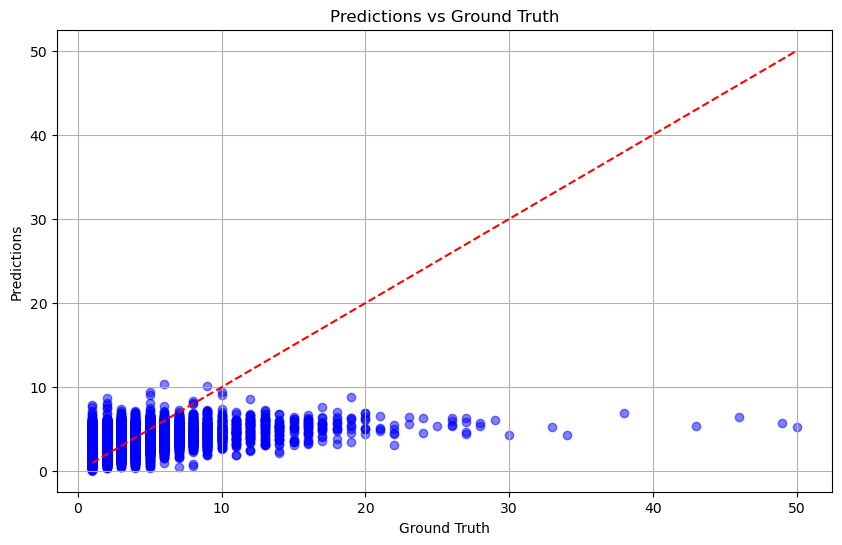

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define categorical and numerical columns
categorical_cols = ['Hour', 'Weather_Condition', 'Sunrise_Sunset', 'Wind_Direction', 'Day_of_Week', 'Month', 'Is_Weekend', 'Week_of_Year', 'Year']
numerical_cols = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

# Define preprocessing for categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),  # No scaling or transformation for numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encoding for categorical features
    ])

# Create the pipeline with preprocessing and the linear regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

import matplotlib.pyplot as plt

# Plot predictions vs ground truth
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Predictions vs Ground Truth')
plt.grid(True)
plt.show()


In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define preprocessing for categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
            ('scaler', StandardScaler())  # Scale the features
        ]), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)  # One-hot encoding for categorical features
    ])

# Create a pipeline with preprocessing and Random Forest Regressor
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Perform cross-validation
cv_scores = cross_val_score(rf_pipeline, features, target, cv=5, scoring='neg_mean_squared_error')

# Compute mean of cross-validation scores
mean_cv_mse = -cv_scores.mean()
print("Cross-Validated Mean Squared Error (MSE):", mean_cv_mse)

# Train the Random Forest model on the full training set
rf_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor MSE:", mse_rf)
print("Random Forest Regressor R^2 Score:", r2_rf)

# Plot predictions vs ground truth
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Predictions vs Ground Truth')
plt.grid(True)
plt.show()


In [41]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Conv1D, MaxPooling1D, Concatenate
from tensorflow.keras.models import Model

# Define the input for categorical features
input_week_of_year = Input(shape=(1,), name='Week_of_Year')
input_is_weekend = Input(shape=(1,), name='Is_Weekend')
input_month = Input(shape=(1,), name='Month')
input_day_of_week = Input(shape=(1,), name='Day_of_Week')
input_hour = Input(shape=(1,), name='Hour')
input_weather_condition = Input(shape=(1,), name='Weather_Condition')
input_sunrise_sunset = Input(shape=(1,), name='Sunrise_Sunset')
input_wind_direction = Input(shape=(1,), name='Wind_Direction')

# Define the embedding layers for high-cardinality features
embedding_week_of_year = Embedding(input_dim=53, output_dim=10)(input_week_of_year)
embedding_is_weekend = Embedding(input_dim=2, output_dim=1)(input_is_weekend)
embedding_month = Embedding(input_dim=13, output_dim=5)(input_month)
embedding_day_of_week = Embedding(input_dim=8, output_dim=3)(input_day_of_week)
embedding_hour = Embedding(input_dim=25, output_dim=6)(input_hour)
embedding_weather_condition = Embedding(input_dim=10, output_dim=5)(input_weather_condition)
embedding_sunrise_sunset = Embedding(input_dim=2, output_dim=1)(input_sunrise_sunset)
embedding_wind_direction = Embedding(input_dim=8, output_dim=3)(input_wind_direction)

# Flatten the embeddings
flatten_week_of_year = Flatten()(embedding_week_of_year)
flatten_is_weekend = Flatten()(embedding_is_weekend)
flatten_month = Flatten()(embedding_month)
flatten_day_of_week = Flatten()(embedding_day_of_week)
flatten_hour = Flatten()(embedding_hour)
flatten_weather_condition = Flatten()(embedding_weather_condition)
flatten_sunrise_sunset = Flatten()(embedding_sunrise_sunset)
flatten_wind_direction = Flatten()(embedding_wind_direction)

# Concatenate all the features
concatenated_features = Concatenate()([flatten_week_of_year, flatten_is_weekend, flatten_month, flatten_day_of_week, flatten_hour, flatten_weather_condition, flatten_sunrise_sunset, flatten_wind_direction])

# Reshape for 1D convolution
sequence_length = 10  # Adjust this based on the number of features after concatenation
reshaped_features = tf.expand_dims(concatenated_features, axis=1)

# Ensure reshaped_features has sufficient sequence length
# For example, pad or repeat if needed to increase the sequence length
reshaped_features = tf.keras.layers.Concatenate(axis=1)([reshaped_features, tf.zeros((tf.shape(reshaped_features)[0], sequence_length - 1, tf.shape(reshaped_features)[-1]))])

# Apply 1D convolutional layers
conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(reshaped_features)
pool1 = MaxPooling1D(pool_size=2)(conv1)
conv2 = Conv1D(filters=128, kernel_size=3, activation='relu')(pool1)
pool2 = MaxPooling1D(pool_size=2)(conv2)

# Flatten and dense layers
flattened_conv = Flatten()(pool2)
dense1 = Dense(128, activation='relu')(flattened_conv)
dense2 = Dense(64, activation='relu')(dense1)
output = Dense(1)(dense2)  # No activation function for regression

# Define the model
model = Model(inputs=[input_week_of_year, input_is_weekend, input_month, input_day_of_week, input_hour, input_weather_condition, input_sunrise_sunset, input_wind_direction], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])


# Summary of the model
model.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Week_of_Year (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 Is_Weekend (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Month (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 Day_of_Week (InputLayer)       [(None, 1)]          0           []                               
                                                                                            

In [43]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical columns for encoding
categorical_cols = ['Week_of_Year', 'Is_Weekend', 'Month', 'Day_of_Week', 'Hour', 'Weather_Condition', 'Sunrise_Sunset', 'Wind_Direction']
numeric_cols = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

# Define transformers for numeric and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create column transformer with specified transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply transformations
X = aggregated_data.drop(columns=['Accidents','Date_only'])
y = aggregated_data['Accidents']

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)
# Convert sparse matrix to dense matrix
X_processed = X_processed.toarray()

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Fit the model
history = model.fit(
    X_train,
    y_train,
    epochs=10,  # Adjust epochs as needed
    batch_size=32,
    validation_data=(X_test, y_test),  # Provide validation data directly
    verbose=1
)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=1)

# Predict and calculate Mean Squared Error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Print test loss and Mean Squared Error
print(f"Test Loss (MSE): {test_loss[0]}")
print(f"Test Mean Squared Error: {mse}")




Epoch 1/10


ValueError: in user code:

    File "c:\Users\bonis\miniconda3\envs\dsi_participant\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\bonis\miniconda3\envs\dsi_participant\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\bonis\miniconda3\envs\dsi_participant\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\bonis\miniconda3\envs\dsi_participant\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\bonis\miniconda3\envs\dsi_participant\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\bonis\miniconda3\envs\dsi_participant\lib\site-packages\keras\engine\input_spec.py", line 216, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "model_5" expects 8 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 155) dtype=float32>]


In [1]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load data
la_accidents = pd.read_csv("../data/processed/LA_Accidents.csv")

# Data preprocessing
columns_to_keep = [
    'Start_Time', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 
    'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Sunrise_Sunset'
]
filtered_la_accidents = la_accidents[columns_to_keep].copy()
filtered_la_accidents['Date'] = pd.to_datetime(filtered_la_accidents['Start_Time'], format="mixed")

# Impute missing values
numerical_cols = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
data_for_imputation = filtered_la_accidents[numerical_cols]
imputer = KNNImputer(n_neighbors=3)
imputed_data = imputer.fit_transform(data_for_imputation)
imputed_df = pd.DataFrame(imputed_data, columns=numerical_cols, index=filtered_la_accidents.index)
filtered_la_accidents[numerical_cols] = imputed_df

categorical_cols = ['Wind_Direction', 'Weather_Condition']
for col in categorical_cols:
    filtered_la_accidents[col] = filtered_la_accidents[col].astype('category').cat.codes

imputer = KNNImputer(n_neighbors=9)
categorical_data = filtered_la_accidents[categorical_cols]
imputed_data = imputer.fit_transform(categorical_data)
imputed_df = pd.DataFrame(imputed_data, columns=categorical_cols, index=filtered_la_accidents.index)
for col in categorical_cols:
    original_categories = filtered_la_accidents[col].astype('category').cat.categories
    imputed_df[col] = imputed_df[col].round().astype(int)
    imputed_df[col] = original_categories[imputed_df[col].clip(lower=0, upper=len(original_categories)-1)]
filtered_la_accidents[categorical_cols] = imputed_df

filtered_la_accidents['Hour'] = filtered_la_accidents['Date'].dt.hour
filtered_la_accidents['Day_of_Week'] = filtered_la_accidents['Date'].dt.day_name()
filtered_la_accidents['Month'] = filtered_la_accidents['Date'].dt.month_name()
filtered_la_accidents['Is_Weekend'] = filtered_la_accidents['Date'].dt.dayofweek >= 5
filtered_la_accidents['Week_of_Year'] = filtered_la_accidents['Date'].dt.isocalendar().week
filtered_la_accidents['Year'] = filtered_la_accidents['Date'].dt.year



In [2]:

# Aggregate data
filtered_la_accidents['Date_only'] = filtered_la_accidents['Date'].dt.date
hourly_accidents = filtered_la_accidents.groupby(['Date_only','Hour']).size().reset_index(name='Accidents')
numerical_columns = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
numerical_aggregates = filtered_la_accidents.groupby(['Date_only', 'Hour'])[numerical_columns].mean().reset_index()
categorical_columns = ['Weather_Condition', 'Sunrise_Sunset', 'Wind_Direction']
def get_most_frequent(series):
    return series.mode()[0] if not series.mode().empty else None
categorical_aggregates = filtered_la_accidents.groupby(['Date_only', 'Hour'])[categorical_columns].agg(get_most_frequent).reset_index()
additional_columns = ['Day_of_Week', 'Month', 'Is_Weekend', 'Week_of_Year']
additional_data = filtered_la_accidents.groupby(['Date_only', 'Hour'])[additional_columns].first().reset_index()
aggregated_data = hourly_accidents.merge(numerical_aggregates, on=['Date_only', 'Hour'])
aggregated_data = aggregated_data.merge(categorical_aggregates, on=['Date_only', 'Hour'])
aggregated_data = aggregated_data.merge(additional_data, on=['Date_only', 'Hour'])
aggregated_data = aggregated_data.drop(columns=['Date_only'])




In [3]:
# Define predictors and target
categorical_cols = ['Week_of_Year', 'Is_Weekend', 'Month', 'Day_of_Week', 'Hour', 'Weather_Condition', 'Sunrise_Sunset', 'Wind_Direction']
numeric_cols = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
target_col = 'Accidents'
X = aggregated_data[categorical_cols + numeric_cols]
y = aggregated_data[target_col]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Preprocessing and model pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])
history = model.fit(X_train, y_train)


Mean Squared Error: 7.24


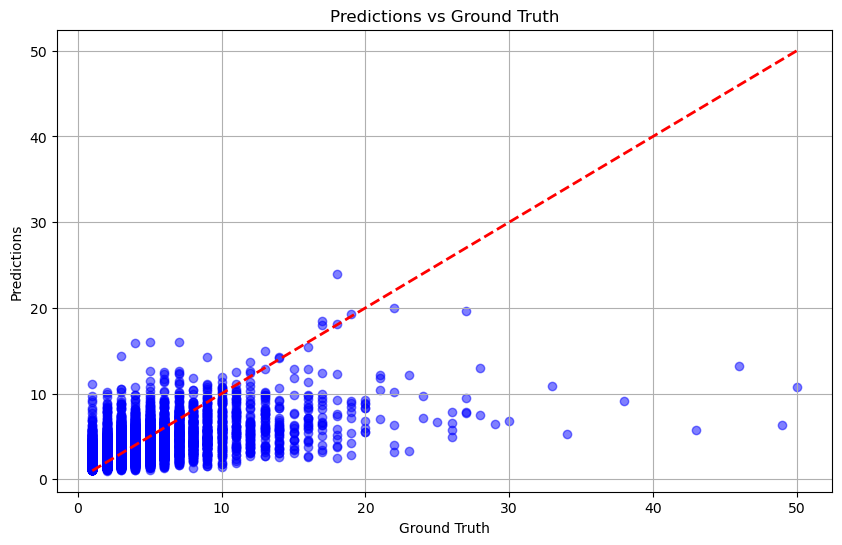

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plot predictions vs ground truth
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line of perfect prediction
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Predictions vs Ground Truth')
plt.grid(True)
plt.show()